# Cardio Good Fitnes data

   In this raport I will present the data from kaggle site which are about sale of treadmill product offered by CardioGood Fitness [link](https://www.kaggle.com/saurav9786/cardiogoodfitness).
Using libralies which are invented to inport, modify and analyze date such as numpy, pandas and seaborn I will try to check and present as much interesting informations about this data as I can.<br>

First the short summary of the data. There are 180 rows, which where collected during 3 months.
<br>The list of columns names with short description:<br>
<br>**Product** : 3 types of treadmill which are in the offer (TM195, TM498, TM798)
<br>**Age** : age of suppliers
<br>**Gender** : division by gender (Male, Female)
<br>**Education** : years of education
<br>**MaritalStatus** : relationship status (Single, Partnered)
<br>**Usage** : average number of times the customer plans to use the treadmill each week
<br>**Fitness** : self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape
<br>**Miles** : average number of miles the customer expects to walk/run each week
<br>**Income** : annual household income in $

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CardioGoodFitness.csv')
print(df.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47


## Which gender  is using it more?

I will try to show which gender declared that will be using treadmill more often and how many miles they want to run weekly. Also I want to check if there is some relation between maritial status and these two other variables. 

Text(0.5, 1.0, 'Quantity of declared miles and usage by maritial status')

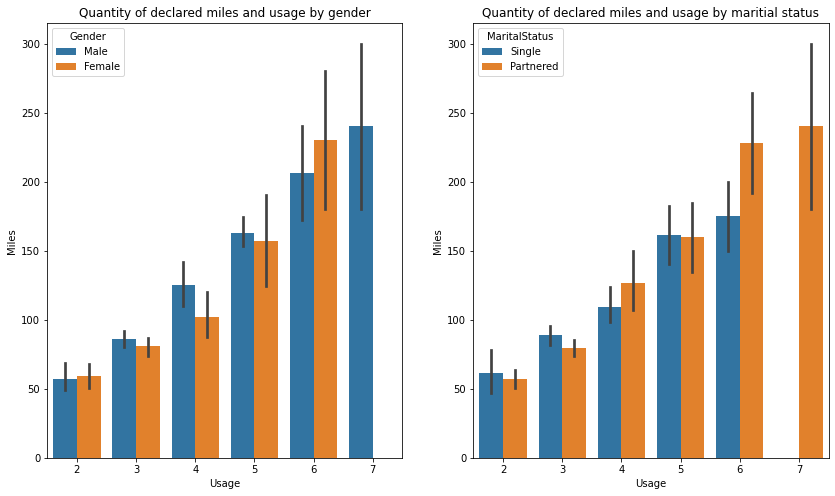

In [2]:
size = (14,8)
f, (ax1,ax2) = plt.subplots(1, 2,figsize=size)
sns.barplot(x='Usage',y='Miles',hue="Gender",data=df, ax=ax1)
sns.barplot(x='Usage',y='Miles',hue="MaritalStatus",data=df, ax=ax2)
ax1.set_title('Quantity of declared miles and usage by gender')
ax2.set_title('Quantity of declared miles and usage by maritial status')

As we can see from the first plot, male gender was declaring higher amount of miles almost every time, and this is the only one gender where usage 7 times per week appear. On the other plot we can see that the persons who where in some relationship was declaring that will spend more time on their treadmill, and also that was the ones who should do workout 7 times per week.

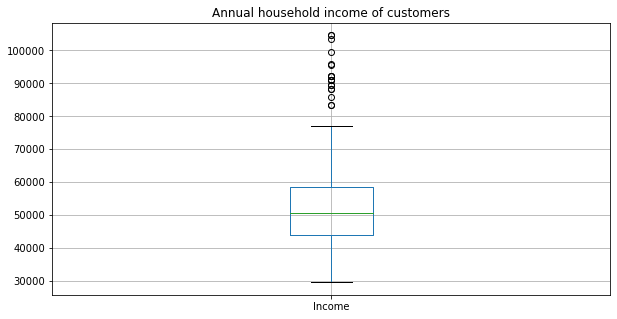

In [3]:
size = (10,5)
f, axes = plt.subplots(figsize=size)
boxplot = df.boxplot(column = 'Income',)
plt.title('Annual household income of customers')
plt.show()

From the boxplot we can see that the income was usualy around 4.5k to 5.5k dollars. 

Next question that i ask was which one of that 3 types of treadmill was sold the most times and who was a costumer?

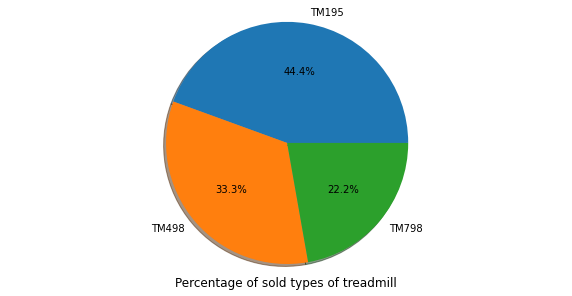

In [4]:
sizes = []
sizes = [i for i in df['Product'].value_counts()]
labels = ['TM195', 'TM498', 'TM798']
size = (10,5)
f, axes = plt.subplots(figsize=size)
p = plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Percentage of sold types of treadmill', y=-0.05)


plt.show()

As we can see the TM195 model was sold the most times, but how about the prices? Maybe the household income was higher for customers which have chosen other model, maybe TM195 was the cheapest one in the store.

Average of household income for model TM195: 46,418.03$
Average of household income for model TM498: 48,973.65$
Average of household income for model TM798: 75,441.57$


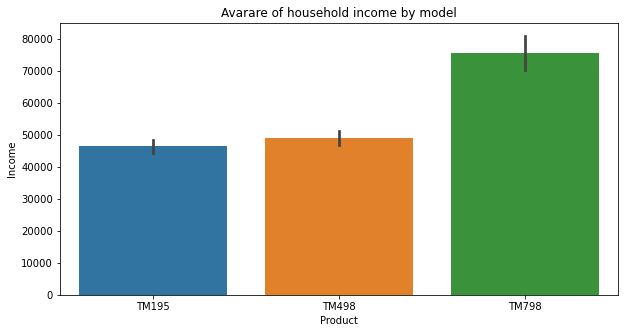

In [5]:
sum_of_income = []
sum_of_income = pd.pivot_table(df, index=['Product'],values=['Income'],aggfunc=np.average)
for i in range(0,3):
    print('Average of household income for model '+str(labels[i])+': '+ "{:,.2f}$".format(sum_of_income['Income'][i]))

f, axes = plt.subplots(figsize=size)
sns.barplot(x='Product',y='Income',data=df)
plt.title('Avarare of household income by model')
plt.show()

We can see that the last one TM798 model, which was sold the fewest copies, was bought by customers with the highest annual household income. As I expect, the TM798 model is the most expensive.

The last things which I would like to check is the corelations between datas, I used for this heatmap which in my opinion shows that very well.

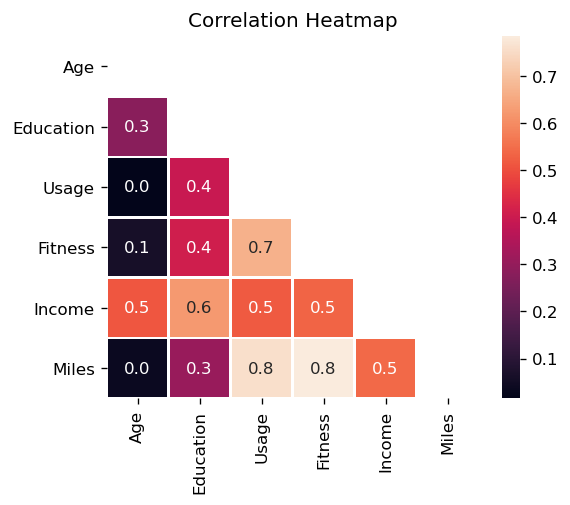

In [6]:
plt.figure(dpi=120,figsize=(5,4))
mask=np.triu(np.ones_like(df.corr(),dtype=bool),0)
sns.heatmap(df.corr(),mask=mask,fmt=".1f",annot=True,lw=1)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Correlation Heatmap')
plt.show()

## Correlation Analysis
- Fitness is highly correlated with Usage and Miles
- Income has strong correlation with Education
- Age has no corelation with Usage or Fitness

Last part of this raport is plot of declared Miles and Usage by Product which show that truly persons who has bought model TM798 declared to be more fitness and wanted to us it more.

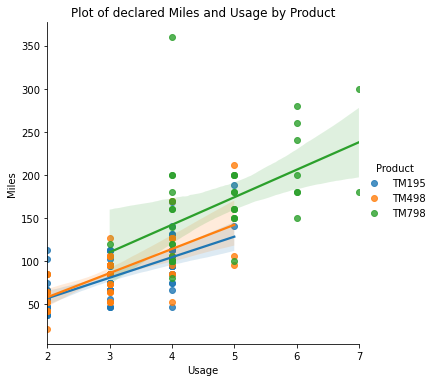

In [7]:
sns.lmplot(x="Usage", y="Miles", hue="Product", data=df)
plt.title('Plot of declared Miles and Usage by Product')
plt.show()

## Summary

At the end i would like to summarise all of the observations that was found:
- male gender was declaring higher amount of miles,
- persons who where in some relationship was declaring that will spend more time on their treadmill,
- most people had an income between 4.5k and 5.5 dollars,
- TM798 model, which was sold the fewest copies, was bought by customers with the highest annual household income and that is making it the most expensive treadmill,
- There are some corelations between Fitness, Usage and Miles or Income with Education,
- persons who has bought TM798 declared to be more fitness.